In [1]:
def Matrix_Q(A, a, b, report=False):
    n = A.nrows()
    plus = vector(QQ, n)
    plus[a] = 1; plus[b] = 1
    minus = vector(QQ, n)
    minus[a] = 1; minus[b] = -1
    
    M = matrix(QQ, n)
    I = matrix(QQ, n)
    
    power = 0
    column = 0
    while column < n:
        M2 = copy(M)
        M2[:, column] = A**power*plus

        if(rank(M2)==rank(M)):
            break
        M = copy(M2)
        I[:, column] = A**power*plus
        power+=1
        column+=1
    if(report): 
        print("Plus")
        print(M)
        print()
    
    power = 0
    while column < n:
        M2 = copy(M)
        M2[:, column] = A**power*minus
        if(rank(M2)==rank(M)):
            break
        M = copy(M2)
        I[:, column] = -(A**power*minus)
        power+=1
        column+=1
    if(report): 
        print("Minus")
        print(M)
        print()
        print("Kernel size", n-column)
        print()
        
    power = 0
    M2 = copy(M)
    while column < n:
        M2[:, column] = M.kernel().basis()[power]
        I[:, column] = M.kernel().basis()[power]
        column+=1
        power+=1
    M = copy(M2)

        
    Q = I*M^(-1)
    if(report): 
        print("Walk Matrix")
        print(M)    
        print("Image")
        print(I)
        print("Matrix Q")
        #print(Q)
    return Q

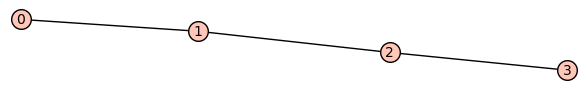

[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]

In [51]:
d = {0:[1], 1:[2], 2:[3]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 0, 3)

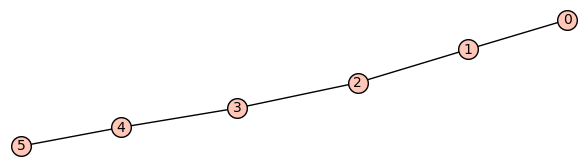

[0 0 0 0 0 1]
[0 0 0 0 1 0]
[0 0 0 1 0 0]
[0 0 1 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]

In [60]:
d = {0:[1], 1:[2], 2:[3], 3:[4], 4:[5]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 0, 5)

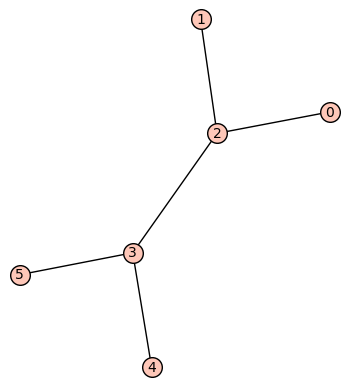

Plus
[0 1 0 0 0 0]
[0 1 0 0 0 0]
[1 1 0 0 0 0]
[1 1 0 0 0 0]
[0 1 0 0 0 0]
[0 1 0 0 0 0]

Minus
[ 0  1  0  1  0  0]
[ 0  1  0  1  0  0]
[ 1  1  1 -1  0  0]
[ 1  1 -1  1  0  0]
[ 0  1  0 -1  0  0]
[ 0  1  0 -1  0  0]

Kernel size 2

Walk Matrix
[ 0  1  0  1  1  0]
[ 0  1  0  1 -1  0]
[ 1  1  1 -1  0  0]
[ 1  1 -1  1  0  0]
[ 0  1  0 -1  0  1]
[ 0  1  0 -1  0 -1]
Image
[ 0  1  0 -1  1  0]
[ 0  1  0 -1 -1  0]
[ 1  1 -1  1  0  0]
[ 1  1  1 -1  0  0]
[ 0  1  0  1  0  1]
[ 0  1  0  1  0 -1]
Matrix Q


[ 1/2 -1/2    0    0  1/2  1/2]
[-1/2  1/2    0    0  1/2  1/2]
[   0    0    0    1    0    0]
[   0    0    1    0    0    0]
[ 1/2  1/2    0    0  1/2 -1/2]
[ 1/2  1/2    0    0 -1/2  1/2]

In [76]:
d = {2:[0, 1, 3], 3:[4, 5]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 2, 3, True)

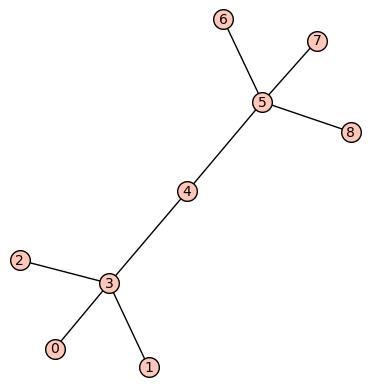

[ 2/3 -1/3 -1/3    0    0    0  1/3  1/3  1/3]
[-1/3  2/3 -1/3    0    0    0  1/3  1/3  1/3]
[-1/3 -1/3  2/3    0    0    0  1/3  1/3  1/3]
[   0    0    0    0    0    1    0    0    0]
[   0    0    0    0    1    0    0    0    0]
[   0    0    0    1    0    0    0    0    0]
[ 1/3  1/3  1/3    0    0    0  2/3 -1/3 -1/3]
[ 1/3  1/3  1/3    0    0    0 -1/3  2/3 -1/3]
[ 1/3  1/3  1/3    0    0    0 -1/3 -1/3  2/3]

In [73]:
d = {3:[0, 1, 2, 4], 4:[5], 5:[6, 7, 8]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 3, 5)

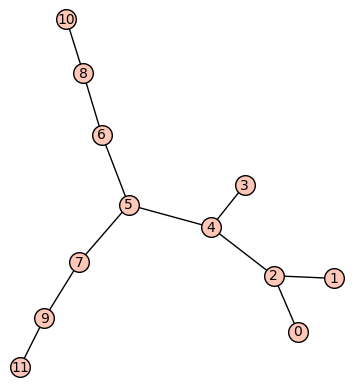

[ 1/2 -1/2    0    0    0    0    0    0  1/2  1/2    0    0]
[-1/2  1/2    0    0    0    0    0    0  1/2  1/2    0    0]
[   0    0    0    0    0    0  1/2  1/2    0    0  1/2  1/2]
[   0    0    0    0    0    0  1/2  1/2    0    0 -1/2 -1/2]
[   0    0    0    0    0    1    0    0    0    0    0    0]
[   0    0    0    0    1    0    0    0    0    0    0    0]
[   0    0  1/2  1/2    0    0  1/2 -1/2    0    0    0    0]
[   0    0  1/2  1/2    0    0 -1/2  1/2    0    0    0    0]
[ 1/2  1/2    0    0    0    0    0    0  1/2 -1/2    0    0]
[ 1/2  1/2    0    0    0    0    0    0 -1/2  1/2    0    0]
[   0    0  1/2 -1/2    0    0    0    0    0    0  1/2 -1/2]
[   0    0  1/2 -1/2    0    0    0    0    0    0 -1/2  1/2]

In [39]:
d = {2:[0, 1], 4:[2, 3, 5], 5:[6, 7], 9:[7, 11], 8:[6, 10]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 4, 5)

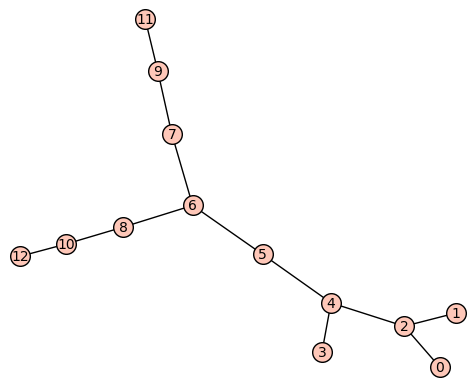

[ 1/2 -1/2    0    0    0    0    0    0    0  1/2  1/2    0    0]
[-1/2  1/2    0    0    0    0    0    0    0  1/2  1/2    0    0]
[   0    0    0    0    0    0    0  1/2  1/2    0    0  1/2  1/2]
[   0    0    0    0    0    0    0  1/2  1/2    0    0 -1/2 -1/2]
[   0    0    0    0    0    0    1    0    0    0    0    0    0]
[   0    0    0    0    0    1    0    0    0    0    0    0    0]
[   0    0    0    0    1    0    0    0    0    0    0    0    0]
[   0    0  1/2  1/2    0    0    0  1/2 -1/2    0    0    0    0]
[   0    0  1/2  1/2    0    0    0 -1/2  1/2    0    0    0    0]
[ 1/2  1/2    0    0    0    0    0    0    0  1/2 -1/2    0    0]
[ 1/2  1/2    0    0    0    0    0    0    0 -1/2  1/2    0    0]
[   0    0  1/2 -1/2    0    0    0    0    0    0    0  1/2 -1/2]
[   0    0  1/2 -1/2    0    0    0    0    0    0    0 -1/2  1/2]

In [38]:
d = {2:[0, 1], 4:[2, 3, 5], 5:[6], 6:[7, 8], 10:[8, 12], 9:[7, 11]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 4, 6)

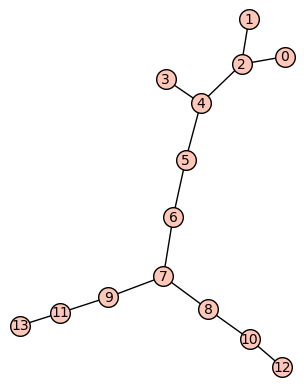

1/2 & -1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 \\
-1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & 1/2 & 1/2 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & -1/2 & -1/2 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1/2 & 1/2 & 0 & 0 & 0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 \\
0 & 0 & 1/2 & 1/2 & 0 & 0 & 0 & 0 & -1/2 & 1/2 & 0 & 0 & 0 & 0 \\
1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & -1/2 & 0 & 0 \\
1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1/2 & 1/2 & 0 & 0 \\
0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & -1/2 \\
0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1/2 & 1/2 \\


In [30]:
#Matrix_Q(Graph(d).adjacency_matrix(), 4, 6)
d = {2:[0, 1], 4:[2, 3, 5], 5:[6], 6:[7], 7:[8, 9], 10:[8, 12], 11:[9, 13]}
Graph(d).plot().show()
M = Matrix_Q(Graph(d).adjacency_matrix(), 4, 7)
for i in range(14):
    print(M[i][0], end = " ")
    for j in range(1, 14):
        print(f"& {M[i][j]}", end=" ")
    print("\\", end="\\")
    print()

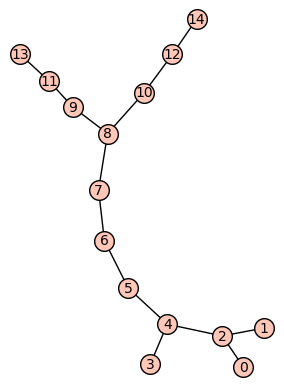

1/2 & -1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & \\
-1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & 1/2 & 1/2 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & 1/2 & 0 & 0 & -1/2 & -1/2 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 & \\
0 & 0 & 1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & -1/2 & 1/2 & 0 & 0 & 0 & 0 & \\
1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & -1/2 & 0 & 0 & \\
1/2 & 1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1/2 & 1/2 & 0 & 0 & \\
0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2 & -1/2 & \\
0 & 0 & 1/2 & -1/2 & 0 & 0 & 0 & 0 &

In [26]:
d = {2:[0, 1], 4:[2, 3, 5], 5:[6], 6:[7], 7:[8], 8:[9, 10], 12:[10, 14], 11:[9, 13]}
Graph(d).plot().show()
M = Matrix_Q(Graph(d).adjacency_matrix(), 5, 7)
for i in range(15):
    for j in range(15):
        print(f"{M[i][j]} & ", end="")
    print("\\", end="\\")
    print()

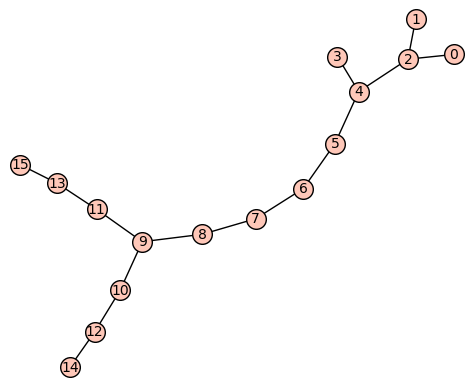

[ 1/2 -1/2    0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0]
[-1/2  1/2    0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0]
[   0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0  1/2  1/2]
[   0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0 -1/2 -1/2]
[   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0]
[   0    0  1/2  1/2    0    0    0    0    0    0  1/2 -1/2    0    0    0    0]
[   0    0  1/2  1/2    0    0    0    0    0    0 -1/2  1/2    0    0    0    0]
[ 1/2  1/2    0 

In [63]:
d = {2:[0, 1], 4:[2, 3, 5], 5:[6], 6:[7], 7:[8], 8:[9], 9:[10, 11], 12:[10, 14], 13:[11, 15]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 4, 9)

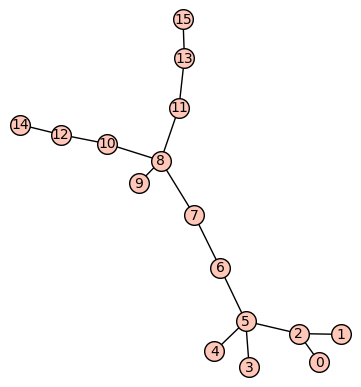

[ 1/2 -1/2    0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0]
[-1/2  1/2    0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0]
[   0    0    0    0    0    0    0    0    0    0  1/2  1/2    0    0  1/2  1/2]
[   0    0    0  1/2 -1/2    0    0    0    0  1/2  1/4  1/4    0    0 -1/4 -1/4]
[   0    0    0 -1/2  1/2    0    0    0    0  1/2  1/4  1/4    0    0 -1/4 -1/4]
[   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0]
[   0    0    0  1/2  1/2    0    0    0    0  1/2 -1/4 -1/4    0    0  1/4  1/4]
[   0    0  1/2  1/4  1/4    0    0    0    0 -1/4  5/8 -3/8    0    0 -1/8 -1/8]
[   0    0  1/2  1/4  1/4    0    0    0    0 -1/4 -3/8  5/8    0    0 -1/8 -1/8]
[ 1/2  1/2    0 

In [64]:
d = {2:[0, 1], 5:[2, 3, 4, 6], 6:[7], 7:[8], 8:[9, 10, 11], 12:[10, 14], 13:[11, 15]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 5, 8)

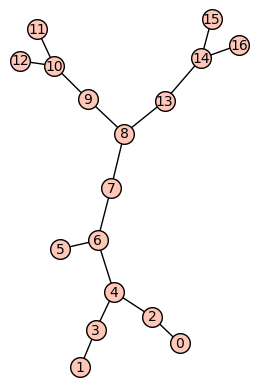

[ 3/4 -1/4    0    0 -1/4  1/4    0    0    0    0    0  1/4  1/4    0    0  1/4  1/4]
[-1/4  3/4    0    0 -1/4  1/4    0    0    0    0    0  1/4  1/4    0    0  1/4  1/4]
[   0    0  1/2 -1/2    0    0    0    0    0    0  1/2    0    0    0  1/2    0    0]
[   0    0 -1/2  1/2    0    0    0    0    0    0  1/2    0    0    0  1/2    0    0]
[-1/4 -1/4    0    0  1/4 -1/4    0    0    0  1/2    0  1/4  1/4  1/2    0  1/4  1/4]
[ 1/4  1/4    0    0 -1/4  1/4    0    0    0  1/2    0 -1/4 -1/4  1/2    0 -1/4 -1/4]
[   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0  1/2  1/2    0    0    0  1/2    0    0    0 -1/2    0    0    0]
[   0    0  1/2  1/2    0    0    0    0    0    0  1/2    0    0    0 -1/2    0    0]
[ 1/4  1/4    0    0  1/4 -1/4    0    0   

In [68]:
d = {4:[2, 3], 2:[0], 3:[1], 6:[5, 4, 7], 7:[8], 8:[9, 13], 10:[9, 11, 12], 14:[13, 15, 16]}
Graph(d).plot().show()
Matrix_Q(Graph(d).adjacency_matrix(), 6, 8)

In [13]:
from sage.graphs.graph_latex import setup_latex_preamble     
setup_latex_preamble() 
latex.extra_preamble()      
latex.engine('pdflatex')   
d = {2:[0, 1], 4:[2, 3, 5], 5:[6], 6:[7], 7:[8, 9], 10:[8, 12], 11:[9, 13]} 
g = Graph(d)
view(g)